## LCC

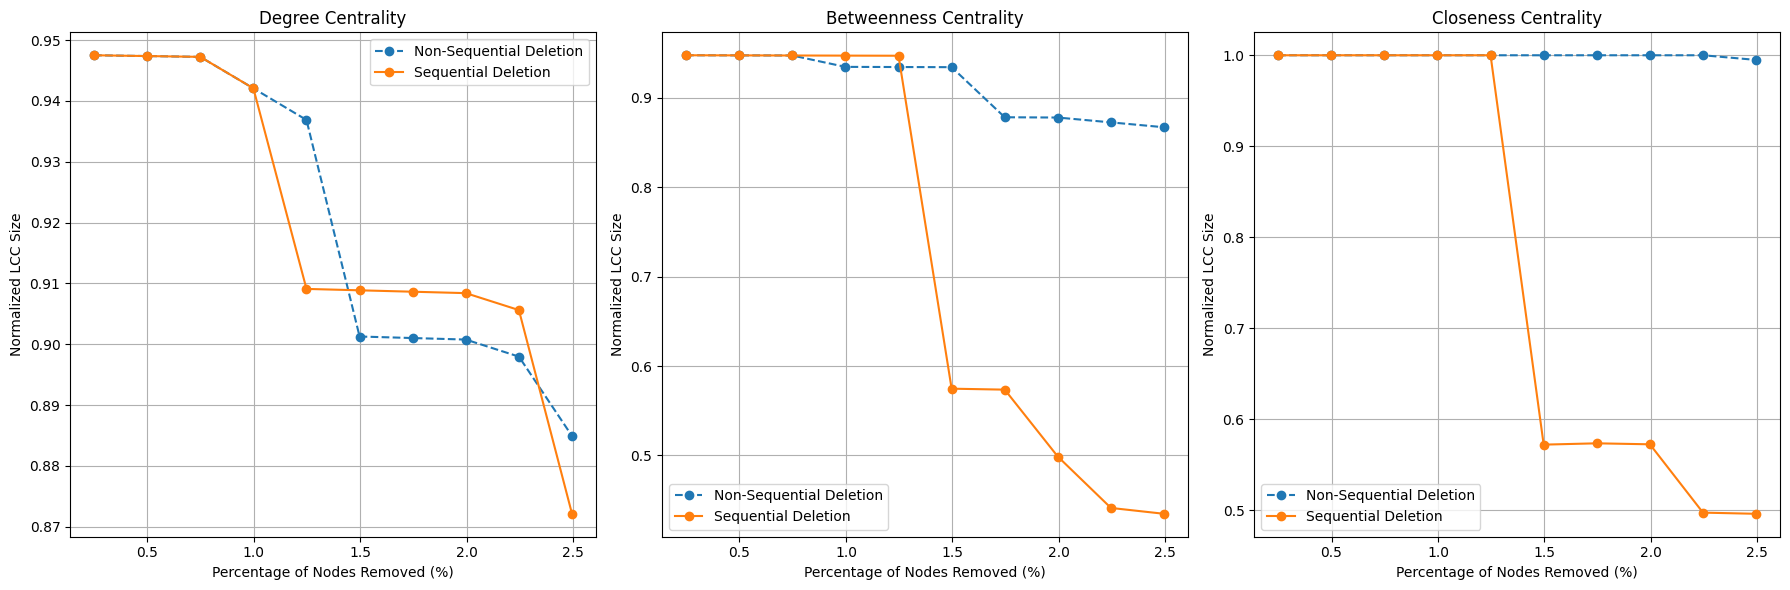

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

G = nx.read_graphml('london.graph.xml')
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])


deg_london = nx.degree_centrality(G)
nx.set_node_attributes(G, deg_london, 'degree')


betw_london = nx.betweenness_centrality(G)
nx.set_node_attributes(G, betw_london, 'betweenness')


closeness_london = nx.closeness_centrality(G)
nx.set_node_attributes(G, closeness_london, 'closeness')

def calculate_normalized_lcc(graph):
    if len(graph) == 0:
        return 0
    largest_cc = max(nx.connected_components(graph), key=len)
    return len(largest_cc) / len(graph.nodes())

def unordered_deletion(graph, sorted_nodes, n=10):
    graph_copy = graph.copy()
    results = []
    for i, node in enumerate(sorted_nodes[:n]):
        graph_copy.remove_node(node)
        normalized_lcc = calculate_normalized_lcc(graph_copy)
        removed_percentage = (i + 1) / len(graph) * 100
        results.append((removed_percentage, normalized_lcc))
    return results

def sequential_deletion(graph, centrality, n=10):
    graph_copy = graph.copy()
    results = []
    for i in range(n):
        centrality_dict = centrality(graph_copy)
        sorted_nodes = sorted(centrality_dict, key=centrality_dict.get, reverse=True)
        node_to_remove = sorted_nodes[0]
        graph_copy.remove_node(node_to_remove)
        normalized_lcc = calculate_normalized_lcc(graph_copy)
        removed_percentage = (i + 1) / len(graph) * 100
        results.append((removed_percentage, normalized_lcc))
    return results

def plot_results_subplot(unordered_results_deg, sequential_results_deg,
                         unordered_results_betw, sequential_results_betw,
                         unordered_results_close, sequential_results_close):
    plt.figure(figsize=(18, 6))  

  
    plt.subplot(1, 3, 1)
    plot_results_combined(unordered_results_deg, sequential_results_deg, 'Degree Centrality')

  
    plt.subplot(1, 3, 2)
    plot_results_combined(unordered_results_betw, sequential_results_betw, 'Betweenness Centrality')

    
    plt.subplot(1, 3, 3)
    plot_results_combined(unordered_results_close, sequential_results_close, 'Closeness Centrality')

    plt.tight_layout()
    plt.show()

def plot_results_combined(unordered_results, sequential_results, title):
    unordered_removed_percentages = [res[0] for res in unordered_results]
    unordered_lcc_sizes = [res[1] for res in unordered_results]
    plt.plot(unordered_removed_percentages, unordered_lcc_sizes, marker='o', linestyle='--', label='Non-Sequential Deletion')

    sequential_removed_percentages = [res[0] for res in sequential_results]
    sequential_lcc_sizes = [res[1] for res in sequential_results]
    plt.plot(sequential_removed_percentages, sequential_lcc_sizes, marker='o', linestyle='-', label='Sequential Deletion')

    plt.title(title)
    plt.xlabel("Percentage of Nodes Removed (%)")
    plt.ylabel("Normalized LCC Size")
    plt.grid(True)
    plt.legend()


G_copy = G.copy()
unordered_results_deg = unordered_deletion(G_copy, sorted(deg_london, key=deg_london.get, reverse=True), n=10)
sequential_results_deg = sequential_deletion(G_copy, nx.degree_centrality, n=10)

G_copy = G.copy()
unordered_results_betw = unordered_deletion(G_copy, sorted(betw_london, key=betw_london.get, reverse=True), n=10)
sequential_results_betw = sequential_deletion(G_copy, nx.betweenness_centrality, n=10)

G_copy = G.copy()
unordered_results_close = unordered_deletion(G_copy, sorted(closeness_london, key=closeness_london.get, reverse=True), n=10)
sequential_results_close = sequential_deletion(G_copy, nx.closeness_centrality, n=10)


plot_results_subplot(unordered_results_deg, sequential_results_deg,
                     unordered_results_betw, sequential_results_betw,
                     unordered_results_close, sequential_results_close)


## Global Efficiency

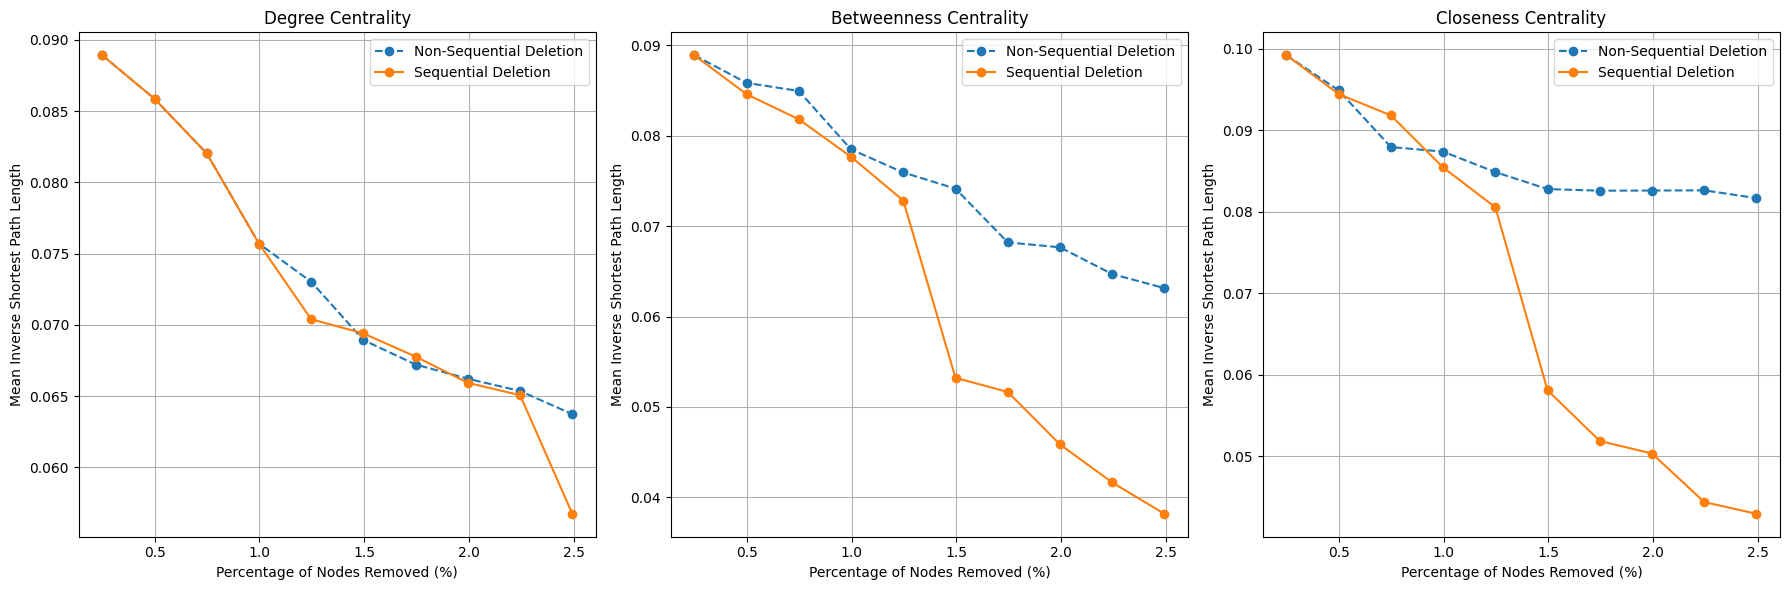

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


G = nx.read_graphml('london.graph.xml')
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])


deg_london = nx.degree_centrality(G)
nx.set_node_attributes(G, deg_london, 'degree')


betw_london = nx.betweenness_centrality(G)
nx.set_node_attributes(G, betw_london, 'betweenness')


closeness_london = nx.closeness_centrality(G)
nx.set_node_attributes(G, closeness_london, 'closeness')

def Global_Efficiency(graph):
    if len(graph) <= 1:
        return 0
    N = len(graph)
    inverse_path_length_sum = 0.0
    for j in graph.nodes():
        for k in graph.nodes():
            if j != k:
                try:
                    shortest_path_length = nx.shortest_path_length(graph, source=j, target=k)
                    inverse_path_length_sum += 1 / shortest_path_length
                except nx.NetworkXNoPath:
                    continue
    mean_inverse_path_length = inverse_path_length_sum / (N * (N - 1))
    return mean_inverse_path_length

def unordered_deletion(graph, sorted_nodes, n=10):
    graph_copy = graph.copy()
    results = []
    for i, node in enumerate(sorted_nodes[:n]):
        graph_copy.remove_node(node)
        mean_inverse_path_length = Global_Efficiency(graph_copy)
        removed_percentage = (i + 1) / len(graph) * 100
        results.append((removed_percentage, mean_inverse_path_length))
    return results

def sequential_deletion(graph, centrality, n=10):
    graph_copy = graph.copy()
    results = []
    for i in range(n):
        centrality_dict = centrality(graph_copy)
        sorted_nodes = sorted(centrality_dict, key=centrality_dict.get, reverse=True)
        node_to_remove = sorted_nodes[0]
        graph_copy.remove_node(node_to_remove)
        mean_inverse_path_length = Global_Efficiency(graph_copy)
        removed_percentage = (i + 1) / len(graph) * 100
        results.append((removed_percentage, mean_inverse_path_length))
    return results

def plot_results_subplot(unordered_results_deg, sequential_results_deg,
                         unordered_results_betw, sequential_results_betw,
                         unordered_results_close, sequential_results_close):
    plt.figure(figsize=(18, 6)) 

  
    plt.subplot(1, 3, 1)
    plot_results_combined(unordered_results_deg, sequential_results_deg, 'Degree Centrality')


    plt.subplot(1, 3, 2)
    plot_results_combined(unordered_results_betw, sequential_results_betw, 'Betweenness Centrality')

    
    plt.subplot(1, 3, 3)
    plot_results_combined(unordered_results_close, sequential_results_close, 'Closeness Centrality')

    plt.tight_layout()
    plt.show()

def plot_results_combined(unordered_results, sequential_results, title):
    unordered_removed_percentages = [res[0] for res in unordered_results]
    unordered_inverse_path_lengths = [res[1] for res in unordered_results]
    plt.plot(unordered_removed_percentages, unordered_inverse_path_lengths, marker='o', linestyle='--', label='Non-Sequential Deletion')

    sequential_removed_percentages = [res[0] for res in sequential_results]
    sequential_inverse_path_lengths = [res[1] for res in sequential_results]
    plt.plot(sequential_removed_percentages, sequential_inverse_path_lengths, marker='o', linestyle='-', label='Sequential Deletion')

    plt.title(title)
    plt.xlabel("Percentage of Nodes Removed (%)")
    plt.ylabel("Mean Inverse Shortest Path Length")
    plt.grid(True)
    plt.legend()


G_copy = G.copy()
unordered_results_deg = unordered_deletion(G_copy, sorted(deg_london, key=deg_london.get, reverse=True), n=10)
sequential_results_deg = sequential_deletion(G_copy, nx.degree_centrality, n=10)

G_copy = G.copy()
unordered_results_betw = unordered_deletion(G_copy, sorted(betw_london, key=betw_london.get, reverse=True), n=10)
sequential_results_betw = sequential_deletion(G_copy, nx.betweenness_centrality, n=10)

G_copy = G.copy()
unordered_results_close = unordered_deletion(G_copy, sorted(closeness_london, key=closeness_london.get, reverse=True), n=10)
sequential_results_close = sequential_deletion(G_copy, nx.closeness_centrality, n=10)


plot_results_subplot(unordered_results_deg, sequential_results_deg,
                     unordered_results_betw, sequential_results_betw,
                     unordered_results_close, sequential_results_close)
